In [1]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE


# **Loading Data :**

In [3]:
# Load the .mat file
filename='influenza_outbreak_dataset.mat'
mat_data = loadmat(filename)

# Given array of arrays of keywords
flu_keywords = np.array(mat_data['flu_keywords'][0])

# Initialize an empty list to store concatenated keywords
all_keywords = []

# Iterate over each array of keywords and concatenate them
for keyword_array in flu_keywords:
    all_keywords.extend(keyword_array)

# Convert the list to a numpy array
all_keywords_array = np.array(all_keywords)

print("key words: ",all_keywords_array)
print(len(all_keywords_array))

# Given array of arrays of locations
flu_locs = np.array(mat_data['flu_locs'][0])

# Initialize an empty list to store concatenated locations
all_locs = []

# Iterate over each array of locations and concatenate them
for loc_array in flu_locs:
    all_locs.extend(loc_array)

# Convert the list to a numpy array
all_locs_array = np.array(all_locs)

print("States: ",all_locs_array)
print(len(all_locs_array))


key words:  ['flu' 'swine' 'stomach' 'symptoms' 'virus' 'bug' 'strep' 'season'
 'influenza' 'fever' 'thera' 'poisoning' 'pneumonia' 'bird' 'infection'
 'epidemic' 'week' 'bronchitis' 'sucks' 'immune' 'soon' 'colds' 'caught'
 'medicine' 'soup' 'weekend' 'dying' 'recovering' 'weeks' 'meds' 'sick'
 'outbreak' 'cough' 'sickness' 'strain' 'jab' 'kicking' 'catch' 'catching'
 'bed' 'contagious' 'days' 'aches' 'yesterday' 'battling' 'cure' 'coming'
 'doctor' 'rest' 'worst' 'tomorrow' 'case' 'illness' 'hours' 'due' 'worse'
 'system' 'ini' 'weight' 'sinus' 'body' 'germs' 'morning' 'hangover'
 'death' 'awful' 'hospital' 'fighting' '12s' 'away' 'feeling' 'sakit'
 'horrible' 'miserable' 'since' 'ebola' 'lagi' 'die' 'chills' 'finals'
 'vaccination' 'pounds' 'weather' 'nasty' 'played' 'hour' 'healthy'
 'sicker' 'winter' 'finally' 'plague' 'spreading' 'food' 'avian' 'tablets'
 'joke' 'pigs' 'severe' 'ridden' 'missed' 'terrible' 'puking' 'disease'
 'ago' 'mono' 'coughing' 'tea' 'vaccine' 'office' 'ill'

In [4]:
# Initialize an empty DataFrame for training data
train_data = pd.DataFrame()

# Iterate over each element in mat_data['flu_X_tr'][0] to construct the training DataFrame
for index, element in enumerate(mat_data['flu_X_tr'][0]):
    dense_matrix = element.toarray()
    df = pd.DataFrame(dense_matrix)
    df['target'] = mat_data['flu_Y_tr'][0][index].flatten()
    df['state'] = all_locs_array[index]

    # Concatenate df with train_data
    train_data = pd.concat([train_data, df])

# Resetting the index of the train_data DataFrame
train_data.reset_index(drop=True, inplace=True)

# Ensure column names are strings
train_data.columns = train_data.columns.astype(str)

# Display the train_data DataFrame
print(train_data.head)

<bound method NDFrame.head of          0    1    2    3    4    5    6    7    8    9  ...  537  538  539  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
52555  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
52556  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  0.0  0.0  1.0   
52557  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
52558  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0   
52559  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       540  541  542 

In [5]:
# Initialize an empty DataFrame
test_data = pd.DataFrame()

# Iterate over each element in data['flu_X_tr'][0]
for index, element in enumerate(mat_data['flu_X_te'][0]):
    dense_matrix = element.toarray()
    df = pd.DataFrame(dense_matrix)
    df['target'] = mat_data['flu_Y_te'][0][index].flatten()
    df['state'] = all_locs_array[index]

    # Concatenate df with merged_df
    test_data = pd.concat([test_data, df])

# Resetting the index of the DataFrame
test_data.reset_index(drop=True, inplace=True)

test_data.columns = test_data.columns.astype(str)
# Display the DataFrame
print(test_data)


         0    1    2    3    4    5    6    7    8    9  ...  537  538  539  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
23275  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
23276  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
23277  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
23278  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
23279  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       540  541  542  543  544  target       state 

# **Splitting Data:**

In [6]:
# Split the data into training, validation, and test sets
test_data, val_data = train_test_split(test_data, test_size=0.4, stratify=test_data['target'], random_state=42)

# Separate features and targets
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']
X_val = val_data.drop(columns=['target'])
y_val = val_data['target']
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# **Data Preprocessing and EDA:**

### Missing values:

In [7]:
# Check for missing values
missing_values = X_train.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 0        0
1        0
2        0
3        0
4        0
        ..
541      0
542      0
543      0
544      0
state    0
Length: 546, dtype: int64


### Duplicates:

In [8]:
# Check for duplicates
duplicates = X_train.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 4123


In [9]:
X_train.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,536,537,538,539,540,541,542,543,544,state
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wyoming
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wyoming
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wyoming
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wyoming
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wyoming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,new mexico
52556,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,new mexico
52557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,new mexico
52558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,new mexico


## EDA:

In [10]:
data = pd.concat([train_data, test_data])
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,536,537,538,539,540,541,542,543,544,target
count,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,...,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000
mean,1.047920,1.701314,2.065627,2.337091,2.559358,2.755607,2.922514,3.076960,3.227348,3.369694,...,0.011093,0.040479,0.013062,0.380396,0.037789,0.006058,0.017842,0.099732,0.008207,0.064244
std,2.662668,3.810815,4.458296,4.907322,5.271106,5.594931,5.866949,6.127255,6.393618,6.636515,...,0.118856,0.219866,0.180174,0.965161,0.243205,0.085168,0.149848,0.396356,0.100618,0.245188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,152.000000,264.000000,304.000000,308.000000,314.000000,314.000000,325.000000,326.000000,338.000000,338.000000,...,11.000000,7.000000,26.000000,32.000000,13.000000,4.000000,5.000000,11.000000,3.000000,1.000000


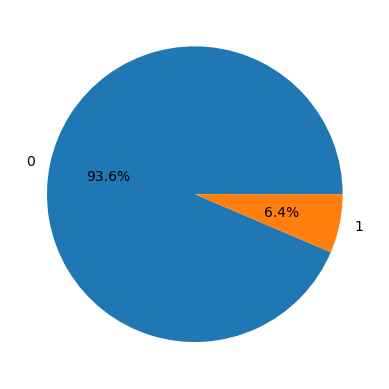

In [11]:
plt.pie(data['target'].value_counts(), labels=data['target'].unique().tolist(), autopct='%1.1f%%')
plt.show()

## Checking for most frequent word:

In [12]:
import pandas as pd

# Assuming 'data' is your DataFrame
data_numeric = data.drop(columns='state')
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')

# Now you can calculate sums and find the column with the highest sum
sums = data_numeric.sum()
max_sum_column_name = sums.idxmax()
max_sum_column_value = sums.max()

print("Column with the highest sum:", max_sum_column_name)
print("Highest sum:", max_sum_column_value)

Column with the highest sum: 20
Highest sum: 999436.0


In [13]:
sums = data_numeric.sum()

# Get the 10 columns with the highest sum
top_10_columns = sums.nlargest(10)

print("Top 10 columns with the highest sum:")
print(top_10_columns)

Top 10 columns with the highest sum:
20    999436.0
19    303457.0
18    296647.0
17    289801.0
16    283006.0
15    275174.0
14    267757.0
13    259494.0
12    250876.0
11    242382.0
dtype: float64


### frequent word in each target value:

In [14]:
# 1: y=0
data_0 = data_numeric[data_numeric['target']==0]
sums = data_0.sum()

# Get the 10 columns with the highest sum
top_10_columns = sums.nlargest(30)

print("Top 10 columns with the highest sum:")
print(top_10_columns)

sums = data_0.sum()

# Get the 10 columns with the highest sum
top_10_columns = sums.nsmallest(10)

print("Top 10 columns with the highest sum:")
print(top_10_columns)

Top 10 columns with the highest sum:
20     828019.0
19     259548.0
18     254036.0
17     248381.0
16     242770.0
15     236451.0
14     230499.0
13     223651.0
12     216637.0
11     209759.0
10     202443.0
9      195040.0
8      187169.0
7      178735.0
6      170207.0
5      160916.0
4      149939.0
3      137487.0
2      122145.0
1      101162.0
22      70951.0
50      68122.0
0       61906.0
135     51709.0
36      25658.0
21      24133.0
539     20915.0
61      19961.0
90      19607.0
23      19049.0
dtype: float64
Top 10 columns with the highest sum:
target      0.0
541       316.0
501       335.0
488       346.0
450       351.0
495       351.0
432       355.0
453       359.0
451       366.0
434       374.0
dtype: float64


In [15]:
# 1: y=1
data_1 = data_numeric[data_numeric['target']==1]
sums = data_1.sum()

# Get the 10 columns with the highest sum
top_10_columns = sums.nlargest(25)

print("Top 10 columns with the highest sum:")
print(top_10_columns)

Top 10 columns with the highest sum:
20     171417.0
19      43909.0
18      42611.0
17      41420.0
16      40236.0
15      38723.0
14      37258.0
13      35843.0
12      34239.0
11      32623.0
10      31009.0
9       29139.0
8       27540.0
7       25969.0
6       24222.0
5       22409.0
4       20330.0
3       17995.0
2       15277.0
50      14545.0
1       12023.0
22       8689.0
0        7810.0
135      7808.0
36       5714.0
dtype: float64


In [16]:
sums = data_1.sum()

# Get the 10 columns with the highest sum
top_10_columns = sums.nsmallest(10)

print("Top 10 columns with the highest sum:")
print(top_10_columns)

Top 10 columns with the highest sum:
378    12.0
476    20.0
450    21.0
451    22.0
373    24.0
495    24.0
440    26.0
364    28.0
351    30.0
405    31.0
dtype: float64


In [17]:
all_keywords_array[[378,476, 488, 432]]

array(['spent', 'forward', 'stupid', 'activity'], dtype='<U13')

### sum of occurences in each word:

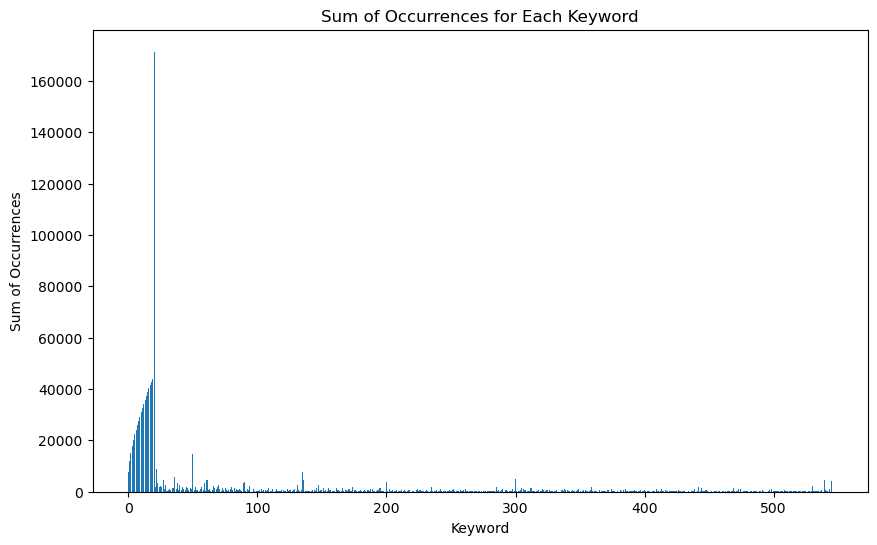

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'dataset' is your dataset containing the keywords and their occurrences

# Sum the occurrences of each keyword
keyword_sums = sums

# Get the keywords
keywords = range(len(keyword_sums))  # Assuming keywords are represented by indices

# Plot the sum of occurrences for each keyword
plt.figure(figsize=(10, 6))
plt.bar(keywords, keyword_sums)
plt.xlabel('Keyword')
plt.ylabel('Sum of Occurrences')
plt.title('Sum of Occurrences for Each Keyword')
# plt.xticks(keywords)  # Set the x-ticks to be the keyword indices
plt.show()

# **Data Balancing:**

### Over_sampling:
 After conducting Exploratory Data Analysis (EDA), we observed that the dataset exhibits a bias towards class 0. To address this imbalance and ensure optimal performance of our classification algorithms, we plan to oversample the majority class in the training data. By doing so, we aim to create a more balanced dataset that will improve the algorithms' ability to generalize across classes and make accurate predictions.

In [19]:
# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)

# Handle imbalance in the training set
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns
numerical_columns = X_train_resampled.select_dtypes(include=['number']).columns

# Initialize Min-Max scaler
min_max_scaler = MinMaxScaler()

# Normalize the numerical columns using Min-Max scaling
X_train_resampled[numerical_columns] = min_max_scaler.fit_transform(X_train_resampled[numerical_columns])
X_test[numerical_columns] = min_max_scaler.transform(X_test[numerical_columns])
X_val[numerical_columns] = min_max_scaler.transform(X_val[numerical_columns])


# **Feature selection:**

In [21]:

# Drop the 'state' column for correlation calculation
X_train_descriptive = X_train_resampled.drop(columns=['state'])

# Feature selection based on correlation threshold
correlation_threshold = 0.2  # Define your threshold here
correlations = X_train_descriptive.corrwith(y_train_resampled)

# Select features with correlation above the threshold
selected_features = correlations[abs(correlations) > correlation_threshold].index.tolist()

# Print the number of features selected
print(f"Number of features selected: {len(selected_features)}")

# Include 'state' column
selected_features_with_state = selected_features + ['state']

# Update training set with selected features
X_train = X_train_resampled[selected_features_with_state]

# Extract the selected features from the test data
X_test_selected = X_test[selected_features_with_state]

Number of features selected: 55


### State Hot_Encoding:

In [22]:
# One-hot encode the 'state' column in the training set
X_train = pd.get_dummies(X_train, columns=['state'])

In [23]:
# Validate the model using the validation set
X_val_selected = X_val[selected_features_with_state]
X_val_selected = pd.get_dummies(X_val_selected, columns=['state'])
X_val_selected = X_val_selected.reindex(columns=X_train.columns, fill_value=0)

# One-hot encode the 'state' column in the test data
X_test_selected = pd.get_dummies(X_test_selected, columns=['state'])
X_test_selected = X_test_selected.reindex(columns=X_train.columns, fill_value=0)

# **Desicion Tree Classifier:**

### **Training:**

In [24]:
# Train the Decision Tree classifier
dt_classifier1 = DecisionTreeClassifier()
dt_classifier1.fit(X_train, y_train_resampled)


DecisionTreeClassifier()

### **Train Accuracy:**

In [25]:
# Make predictions on the training data
y_train_pred1 = dt_classifier1.predict(X_train)

# Evaluate on training set
train_accuracy1 = accuracy_score(y_train_resampled, y_train_pred1)
print("Training Set Evaluation:")
print(classification_report(y_train_resampled, y_train_pred1))
print("Training Accuracy:", train_accuracy1)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     49655
           1       0.99      0.98      0.99     49655

    accuracy                           0.99     99310
   macro avg       0.99      0.99      0.99     99310
weighted avg       0.99      0.99      0.99     99310

Training Accuracy: 0.9887825999395832


### **Validation accuracy:**

In [26]:
# Make predictions on the validation data
y_val_pred1 = dt_classifier1.predict(X_val_selected)

# Evaluate on validation set
val_accuracy1 = accuracy_score(y_val, y_val_pred1)
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred1))
print("Validation Accuracy:", val_accuracy1)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8399
           1       0.35      0.17      0.23       913

    accuracy                           0.89      9312
   macro avg       0.63      0.57      0.58      9312
weighted avg       0.86      0.89      0.87      9312

Validation Accuracy: 0.8878865979381443


### **Testing:**

In [27]:
# Make predictions on the test data
y_test_pred1 = dt_classifier1.predict(X_test_selected)

# Evaluate on test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred1))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred1))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12599
           1       0.40      0.20      0.26      1369

    accuracy                           0.89     13968
   macro avg       0.66      0.58      0.60     13968
weighted avg       0.87      0.89      0.88     13968

Test Accuracy: 0.8920389461626576


### **Pre Pruning:**

In [28]:
dt_classifier3 = DecisionTreeClassifier(
    criterion='gini',       # 'gini' or 'entropy'
    splitter='best',        # 'best' or 'random'
    max_depth=40,           # None, 10, 20, 30, 40, 50
    min_samples_split=10,    # 2, 5, 10
    min_samples_leaf=4,     # 1, 2, 4
    ccp_alpha=0.00015          # 0.0, 0.01, 0.05, 0.1
)

# Fitting the classifier to the training data
dt_classifier3.fit(X_train, y_train_resampled)

DecisionTreeClassifier(ccp_alpha=0.00015, max_depth=40, min_samples_leaf=4,
                       min_samples_split=10)

In [29]:
# Make predictions on the training data
y_train_pred3 = dt_classifier3.predict(X_train)

# Evaluate on training set
train_accuracy3 = accuracy_score(y_train_resampled, y_train_pred3)
print("Training Set Evaluation:")
print(classification_report(y_train_resampled, y_train_pred3))
print("Training Accuracy:", train_accuracy3)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     49655
           1       0.87      0.95      0.91     49655

    accuracy                           0.91     99310
   macro avg       0.91      0.91      0.91     99310
weighted avg       0.91      0.91      0.91     99310

Training Accuracy: 0.9079045413352129


In [30]:
# Make predictions on the validation data
y_val_pred3 = dt_classifier3.predict(X_val_selected)

# Evaluate on validation set
val_accuracy3 = accuracy_score(y_val, y_val_pred3)
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred3))
print("Validation Accuracy:", val_accuracy3)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      8399
           1       0.35      0.47      0.40       913

    accuracy                           0.86      9312
   macro avg       0.65      0.69      0.66      9312
weighted avg       0.88      0.86      0.87      9312

Validation Accuracy: 0.8636168384879725


In [31]:
# Make predictions on the test data
y_test_pred3 = dt_classifier3.predict(X_test_selected)

# Evaluate on test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred3))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred3))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     12599
           1       0.35      0.47      0.40      1369

    accuracy                           0.86     13968
   macro avg       0.64      0.69      0.66     13968
weighted avg       0.88      0.86      0.87     13968

Test Accuracy: 0.8618270332187858


# **Random Forest Classifier:**

### **Training:**

In [32]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Initialize the Random Forest classifier
rf_classifier1 = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier1.fit(X_train, y_train_resampled)





RandomForestClassifier()

### **Train Accuracy:**

In [33]:
# Make predictions on the training data
y_train_pred_rf = rf_classifier1.predict(X_train)

# Calculate training accuracy
print("Training Set Evaluation:")
print(classification_report(y_train_resampled, y_train_pred_rf))
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
print("Random Forest Training Accuracy:", train_accuracy_rf)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     49655
           1       0.99      0.98      0.99     49655

    accuracy                           0.99     99310
   macro avg       0.99      0.99      0.99     99310
weighted avg       0.99      0.99      0.99     99310

Random Forest Training Accuracy: 0.9887825999395832


### **Validation accuracy:**

In [34]:
# Make predictions on the validation data
y_val_pred = rf_classifier1.predict(X_val_selected)

# Evaluate on validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8399
           1       0.38      0.06      0.10       913

    accuracy                           0.90      9312
   macro avg       0.64      0.52      0.52      9312
weighted avg       0.85      0.90      0.86      9312

Validation Accuracy: 0.898303264604811


### **Testing:**

In [35]:

# Make predictions on the test data
y_pred_rf = rf_classifier1.predict(X_test_selected)


# Generate a classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12599
           1       0.36      0.06      0.10      1369

    accuracy                           0.90     13968
   macro avg       0.63      0.52      0.52     13968
weighted avg       0.85      0.90      0.86     13968

Random Forest Accuracy: 0.8974799541809851


### **Hyper parameter tuning:**

In [36]:
rf_classifier2 = RandomForestClassifier(
    bootstrap=True,
    max_depth=30,
    max_features='log2',
    min_samples_leaf=5,
    min_samples_split=35,
    n_estimators=2000
)

# Train the model with the specified parameters
rf_classifier2.fit(X_train, y_train_resampled)

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=5,
                       min_samples_split=35, n_estimators=2000)

In [37]:
# Make predictions on the training data
y_train_pred_rf = rf_classifier2.predict(X_train)

print("Training Set Evaluation:")
print(classification_report(y_train_resampled, y_train_pred_rf))
# Calculate training accuracy
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
print("Training Accuracy:", train_accuracy_rf)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     49655
           1       0.97      0.92      0.95     49655

    accuracy                           0.95     99310
   macro avg       0.95      0.95      0.95     99310
weighted avg       0.95      0.95      0.95     99310

Training Accuracy: 0.9498137146309535


In [38]:
# Make predictions on the validation data
y_val_pred = rf_classifier2.predict(X_val_selected)

# Evaluate on validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8399
           1       0.60      0.26      0.37       913

    accuracy                           0.91      9312
   macro avg       0.76      0.62      0.66      9312
weighted avg       0.89      0.91      0.89      9312

Validation Accuracy: 0.9107603092783505


In [39]:
# Evaluate the model on test data
y_pred = rf_classifier2.predict(X_test_selected)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9121563573883161
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12599
           1       0.61      0.28      0.38      1369

    accuracy                           0.91     13968
   macro avg       0.77      0.63      0.67     13968
weighted avg       0.90      0.91      0.90     13968



# **Naive Bayes:**

### **Training:**

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define the alpha value to use
alpha = 4000

# Initialize the Multinomial Naive Bayes classifier with the specified alpha value
naive_bayes_classifier = MultinomialNB(alpha=alpha)

# Fit the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train_resampled)




MultinomialNB(alpha=4000)

### **Training Accuracy:**

In [41]:
# Evaluate on the training set
y_train_pred_nv = naive_bayes_classifier.predict(X_train)
print("Training Set Evaluation:")
print(classification_report(y_train_resampled, y_train_pred_nv))
train_accuracy = accuracy_score(y_train_resampled, y_train_pred_nv)
print("Training Accuracy:", train_accuracy)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     49655
           1       0.73      0.75      0.74     49655

    accuracy                           0.74     99310
   macro avg       0.74      0.74      0.74     99310
weighted avg       0.74      0.74      0.74     99310

Training Accuracy: 0.7354042895982278


### **Validation Accuracy:**

In [42]:
# Make predictions on the validation data
y_val_pred = naive_bayes_classifier.predict(X_val_selected)

# Evaluate on validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      8399
           1       0.20      0.55      0.29       913

    accuracy                           0.73      9312
   macro avg       0.57      0.65      0.56      9312
weighted avg       0.87      0.73      0.78      9312

Validation Accuracy: 0.7327104810996563


### **Testing:**

In [124]:
# Make predictions on the testing data
y_pred = naive_bayes_classifier.predict(X_test_selected)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84     12599
           1       0.21      0.59      0.31      1369

    accuracy                           0.74     13968
   macro avg       0.58      0.67      0.57     13968
weighted avg       0.87      0.74      0.79     13968

Test Accuracy: 0.7392611683848798


# **SVM:**

### **Training:**

In [43]:
# Train the SVM classifier with default parameters
svm_classifier1 = SVC(class_weight='balanced')
svm_classifier1.fit(X_train, y_train_resampled)


SVC(class_weight='balanced')

### **Training Accuracy:**

In [44]:
# Make predictions on the training data
y_train_pred = svm_classifier1.predict(X_train)

# Evaluate on training set
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Training Set Evaluation:")
print(classification_report(y_train_resampled, y_train_pred))
print("Training Accuracy:", train_accuracy)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     49655
           1       0.88      0.84      0.86     49655

    accuracy                           0.86     99310
   macro avg       0.86      0.86      0.86     99310
weighted avg       0.86      0.86      0.86     99310

Training Accuracy: 0.8593495116302488


### **Validation Accuracy:**

In [45]:
# Make predictions on the validation data
y_val_pred = svm_classifier1.predict(X_val_selected)

# Evaluate on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", val_accuracy)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8399
           1       0.38      0.48      0.43       913

    accuracy                           0.87      9312
   macro avg       0.66      0.70      0.68      9312
weighted avg       0.89      0.87      0.88      9312

Validation Accuracy: 0.8731743986254296


### **Testing:**

In [46]:
# Make predictions on the test data
y_test_pred = svm_classifier1.predict(X_test_selected)

# Evaluate on test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     12599
           1       0.41      0.50      0.45      1369

    accuracy                           0.88     13968
   macro avg       0.68      0.71      0.69     13968
weighted avg       0.89      0.88      0.89     13968

Test Accuracy: 0.8807273768613975


# KNN:

### **Training:**

In [47]:
knn_model = KNeighborsClassifier(n_neighbors=5)
#Fitting the model
knn_model = knn_model.fit(X_train, y_train_resampled)
y_train_pred = knn_model.predict(X_train)

### **Training Accuracy:**

In [48]:
#Computing the MSE
mse = mean_squared_error(y_train_resampled, y_train_pred)
rmse = sqrt(mse)
print("Training RMSE:", rmse)

#Computing the Accuracy
accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Training accuracy:", accuracy)

Training RMSE: 0.18204026129251458
Training accuracy: 0.966861343268553


### **Validation Accuracy**

In [49]:
# predict on val
y_val_pred = knn_model.predict(X_val_selected)

mse = mean_squared_error(y_val, y_val_pred)
rmse = sqrt(mse)
print("val RMSE:", rmse)

#Computing the Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("val accuracy:", accuracy)

val RMSE: 0.33177254867602113
val accuracy: 0.8899269759450171


### **Testing:**

In [50]:
# predict on test
y_test_pred = knn_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_test_pred)
rmse = sqrt(mse)
print("test RMSE:", rmse)

#Computing the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("test accuracy:", accuracy)

test RMSE: 0.33971553358237716
test accuracy: 0.8845933562428407


# **Hyper parameter tuning:**
To find the best value for k, we use GridSearchCV. Which is a tool that we've often used for tuning hyperparameters of machine learning models. In this case, it will help by automatically finding the best value of k for our dataset.


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the KNN model with specified parameters
knn_classifier = KNeighborsClassifier(
    n_neighbors=3,   # Number of neighbors to use
    weights='uniform',  # Weight function used in prediction
    algorithm='auto',  # Algorithm used to compute the nearest neighbors
    leaf_size=20,  # Leaf size passed to BallTree or KDTree
    p=4,  # Power parameter for the Minkowski metric
    metric='minkowski'  # Distance metric
)

# Train the model with the specified parameters
knn_classifier.fit(X_train, y_train_resampled)

KNeighborsClassifier(leaf_size=20, n_neighbors=3, p=4)

In [52]:
# Make predictions on the training data
y_train_pred_knn = knn_classifier.predict(X_train)

print("Training Set Evaluation:")
print(classification_report(y_train_resampled, y_train_pred_knn))
# Calculate training accuracy
train_accuracy_knn = accuracy_score(y_train_resampled, y_train_pred_knn)
print("Training Accuracy:", train_accuracy_knn)


Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     49655
           1       0.97      0.97      0.97     49655

    accuracy                           0.97     99310
   macro avg       0.97      0.97      0.97     99310
weighted avg       0.97      0.97      0.97     99310

Training Accuracy: 0.973225254254355


In [53]:
# Make predictions on the validation data
y_val_pred = knn_classifier.predict(X_val_selected)

# Evaluate on validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8399
           1       0.36      0.18      0.24       913

    accuracy                           0.89      9312
   macro avg       0.64      0.57      0.59      9312
weighted avg       0.86      0.89      0.87      9312

Validation Accuracy: 0.8875644329896907


In [54]:
best_knn_classifier = knn_classifier

In [55]:
# Evaluate the best model on test data
y_pred = best_knn_classifier.predict(X_test_selected)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8842353951890034
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     12599
           1       0.33      0.18      0.23      1369

    accuracy                           0.88     13968
   macro avg       0.62      0.57      0.58     13968
weighted avg       0.86      0.88      0.87     13968



# **ANN:**

# MLP classifier

## Training:

In [56]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# fitting the model
mlp_model.fit(X_train, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

### Training accuracy

In [57]:
# making prediction
y_pred_train = mlp_model.predict(X_train)

print ("train Accuracy: ", accuracy_score(y_pred_train, y_train_resampled))
print("train Classification report: \n", classification_report(y_pred_train, y_train_resampled))

train Accuracy:  0.9722485147517873
train Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     50145
           1       0.97      0.98      0.97     49165

    accuracy                           0.97     99310
   macro avg       0.97      0.97      0.97     99310
weighted avg       0.97      0.97      0.97     99310



### validation accuracy

In [58]:
# making val prediction
y_pred_val = mlp_model.predict(X_val_selected)

print ("val Accuracy: ", accuracy_score(y_pred_val, y_val))
print("val Classification report: \n", classification_report(y_pred_val, y_val))

val Accuracy:  0.8926116838487973
val Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      8813
           1       0.23      0.41      0.29       499

    accuracy                           0.89      9312
   macro avg       0.60      0.67      0.62      9312
weighted avg       0.93      0.89      0.91      9312



# Hyper parameter tuning

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the MLP model with specified parameters
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),  # You can adjust the hidden layer sizes as needed
    activation='relu',          # Activation function for the hidden layer
    solver='adam',              # Solver for weight optimization
    alpha=0.0001,               # L2 penalty (regularization term) parameter
    batch_size='auto',          # Size of minibatches for stochastic optimizers
    learning_rate='constant',   # Learning rate schedule for weight updates
    learning_rate_init=0.001,   # Initial learning rate
    max_iter=200,               # Maximum number of iterations
    shuffle=True,               # Whether to shuffle samples in each iteration
    random_state=None,          # Seed for random number generation
    tol=0.0001,                 # Tolerance for the optimization
    verbose=False,              # Whether to print progress messages to stdout
    warm_start=False,           # Reuse the solution of the previous call to fit as initialization
    momentum=0.9,               # Momentum for gradient descent update
    nesterovs_momentum=True,    # Whether to use Nesterov's momentum
    early_stopping=False,       # Whether to use early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,    # The proportion of training data to set aside as validation set for early stopping
    beta_1=0.9,                 # Exponential decay rate for estimates of first moment vector in adam
    beta_2=0.999,               # Exponential decay rate for estimates of second moment vector in adam
    epsilon=1e-8                # Value for numerical stability in adam
)

# Train the model with the specified parameters
mlp_classifier.fit(X_train, y_train_resampled)

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [60]:
# Make predictions on the training data
y_train_pred_mlp = mlp_classifier.predict(X_train)

print("Training Set Evaluation:")
print(classification_report(y_train_resampled, y_train_pred_mlp))
# Calculate training accuracy
train_accuracy_mlp = accuracy_score(y_train_resampled, y_train_pred_mlp)
print("Training Accuracy:", train_accuracy_mlp)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     49655
           1       0.94      0.94      0.94     49655

    accuracy                           0.94     99310
   macro avg       0.94      0.94      0.94     99310
weighted avg       0.94      0.94      0.94     99310

Training Accuracy: 0.9389286073909979


In [61]:
# Make predictions on the validation data
y_val_pred = mlp_classifier.predict(X_val_selected)

# Evaluate on validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8399
           1       0.41      0.33      0.36       913

    accuracy                           0.89      9312
   macro avg       0.67      0.64      0.65      9312
weighted avg       0.88      0.89      0.88      9312

Validation Accuracy: 0.8884235395189003


In [62]:
best_mlp_classifier = mlp_classifier

In [63]:
# Evaluate the model on test data
y_pred = best_mlp_classifier.predict(X_test_selected)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8934707903780069
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12599
           1       0.44      0.34      0.38      1369

    accuracy                           0.89     13968
   macro avg       0.69      0.65      0.66     13968
weighted avg       0.88      0.89      0.89     13968



# Evaluation

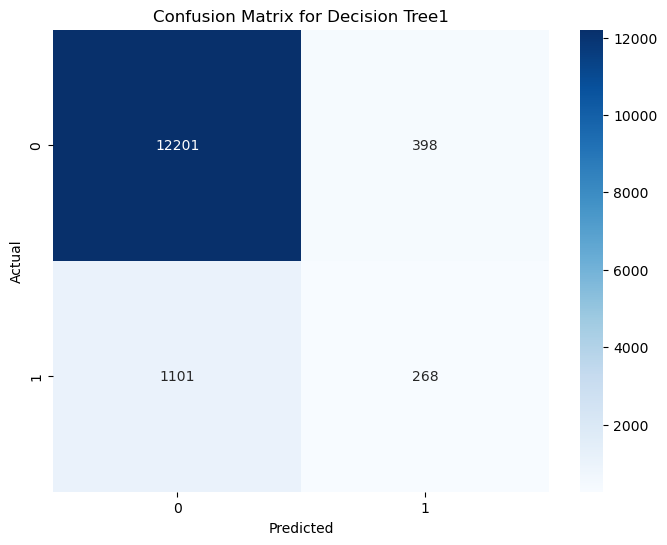

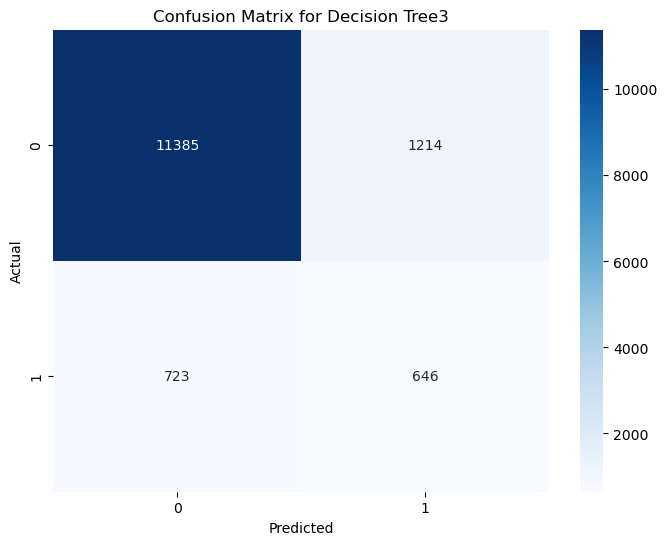

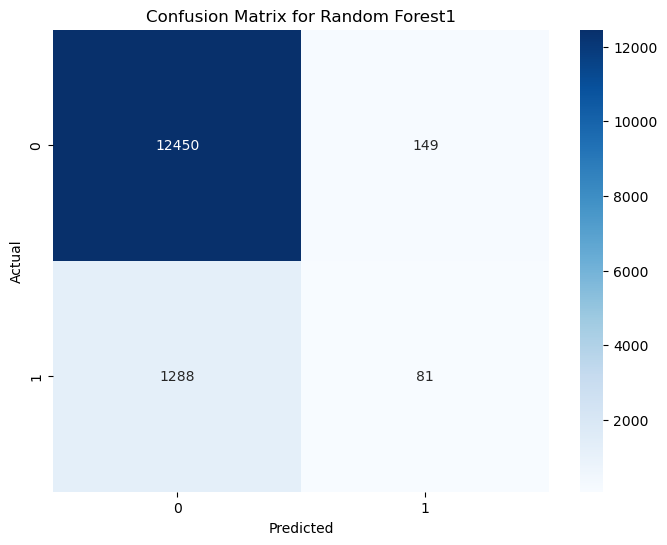

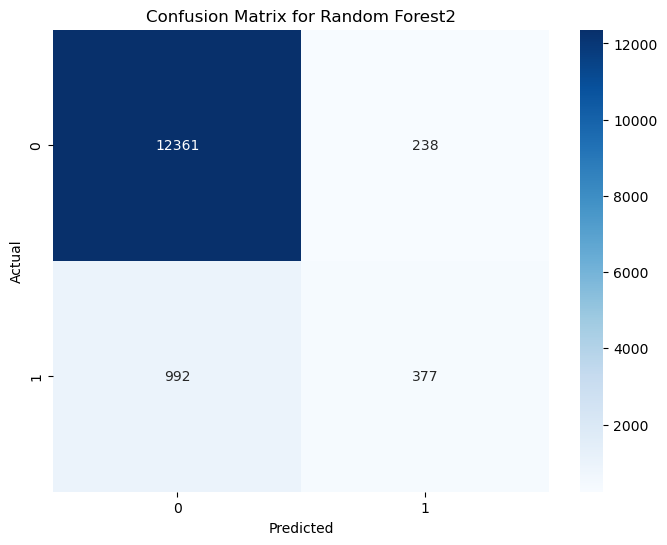

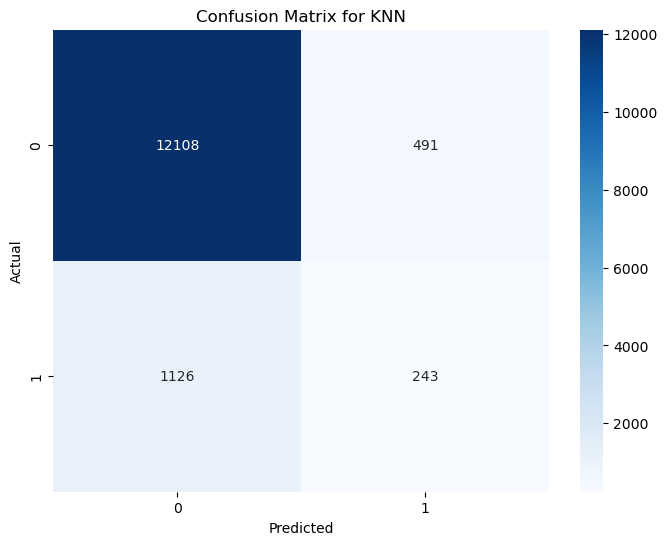

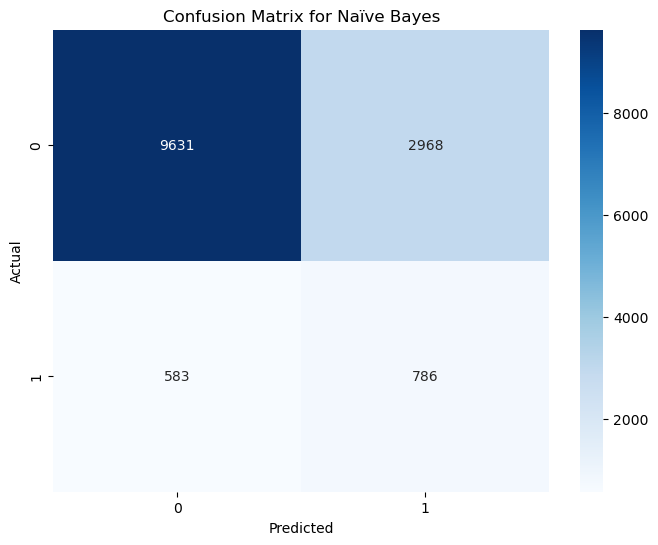

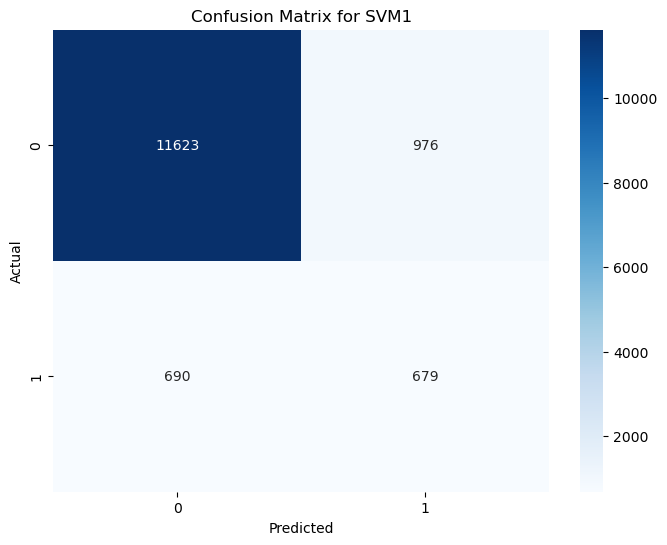

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


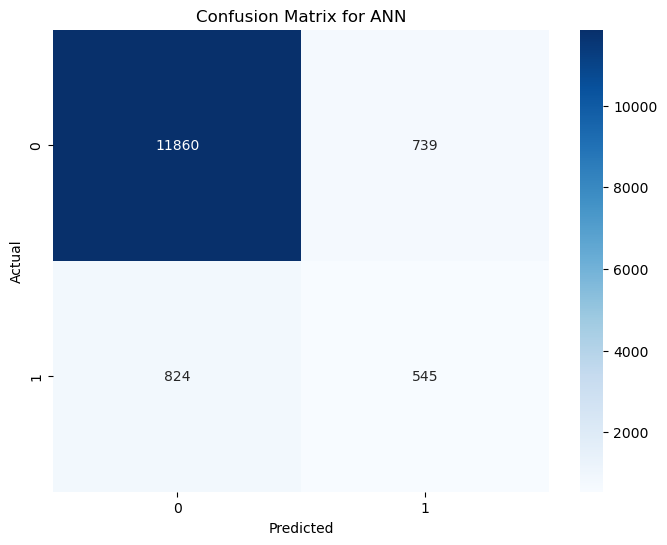

            Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Decision Tree1  0.892683   0.866772  0.892683  0.875603  0.568512
1  Decision Tree3  0.861326   0.882170  0.861326  0.870491  0.666017
2  Random Forest1  0.897122   0.851941  0.897122  0.862706  0.759563
3  Random Forest2  0.911942   0.895062  0.911942  0.896488  0.800627
4             KNN  0.884235   0.857693  0.884235  0.868181  0.590460
5     Naïve Bayes  0.745776   0.871027  0.745776  0.791664  0.745004
6            SVM1  0.880727   0.891655  0.880727  0.885683       NaN
7             ANN  0.888101   0.884994  0.888101  0.886497  0.717976


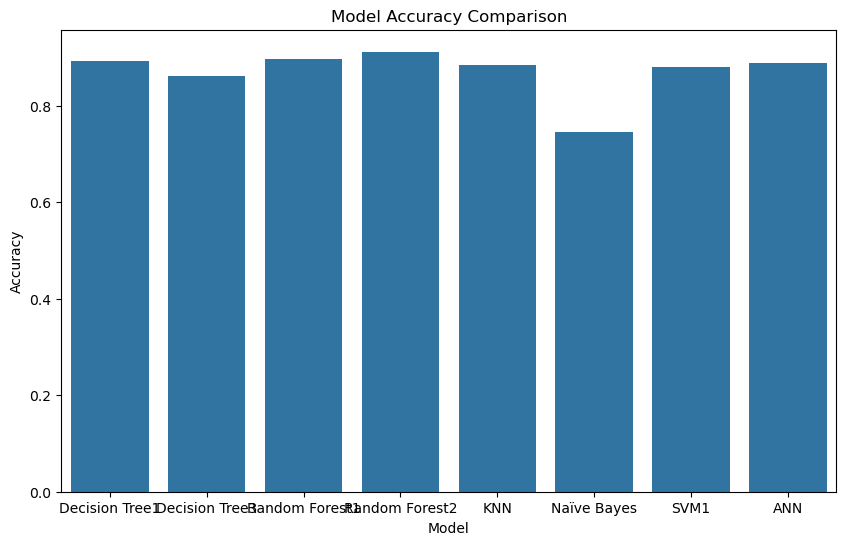

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train the models
models = {
    "Decision Tree1": dt_classifier1,
    "Decision Tree3": dt_classifier3,
    "Random Forest1": rf_classifier1,
    "Random Forest2": rf_classifier2,
    "KNN": best_knn_classifier,
    "Naïve Bayes": naive_bayes_classifier,
    "SVM1": svm_classifier1,
    "ANN": best_mlp_classifier
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    y_pred_proba = model.predict_proba(X_test_selected)[:,1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert results to DataFrame for easy viewing
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# Plotting accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.show()
